<a href="https://colab.research.google.com/github/childult-programmer/BERT/blob/main/KorNLI_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from transformers import BertTokenizer

In [9]:
DATA_IN_PATH = './drive/MyDrive/KorNLI/Data'

In [10]:
TRAIN_XNLI_DF = os.path.join(DATA_IN_PATH, 'multinli.train.ko.tsv')

multinli_data = pd.read_csv(TRAIN_XNLI_DF, sep='\t', error_bad_lines=False)
multinli_data.head(10)

# gold_label: 함의(entailment) / 모순, 상충(contradiction) / 중립(neutral) 

b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [11]:
print(f'전체 mulinli_data 개수: {len(multinli_data)}') # 약 40만 개

전체 mulinli_data 개수: 385494


In [12]:
TRAIN_SNLI_DF = os.path.join(DATA_IN_PATH, 'snli_1.0_train.ko.tsv')

snli_data = pd.read_csv(TRAIN_SNLI_DF, sep='\t', error_bad_lines=False)
snli_data.head(10)

,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment
5,카메라에 웃고 손을 흔드는 아이들,아이들이 얼굴을 찌푸리고 있다,contradiction
6,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년은 인도를 따라 스케이트를 탄다.,contradiction
7,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,그 소년은 스케이트보드를 타는 묘기를 부린다.,entailment
8,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년이 안전 장비를 착용하고 있다.,neutral
9,나이 든 남자가 커피숍의 작은 테이블에 오렌지 주스를 들고 앉아 있고 밝은 색 셔츠...,나이 든 남자가 딸이 퇴근하기를 기다리면서 주스를 마신다.,neutral


In [13]:
print(f'전체 snli_data 개수: {len(snli_data)}') # 약 55만 개

전체 snli_data 개수: 550152


In [14]:
# multinli_data와 snli_data를 하나의 train_data로 합침
train_data = pd.concat([multinli_data, snli_data], axis=0)
train_data.head(10)

,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [15]:
train_data.tail(10)

,sentence1,sentence2,gold_label
550142,다리 위에서 스케이트보드 위에서 장난을 치는 아이,한 아이가 금문교에 있다,neutral
550143,파란 칼라를 가진 개가 밖에서 공놀이를 한다.,개가 소파에 있다,contradiction
550144,파란 칼라를 가진 개가 밖에서 공놀이를 한다.,개가 밖에 있다,entailment
550145,파란 칼라를 가진 개가 밖에서 공놀이를 한다.,개가 공을 쫓고 있다,neutral
550146,네 명의 더러운 맨발의 아이들.,네 명의 아이들이 더러운 발을 가지고 있다.,entailment
550147,네 명의 더러운 맨발의 아이들.,4명의 아이들이 '가장 깨끗한 발'로 상을 받았다,contradiction
550148,네 명의 더러운 맨발의 아이들.,네 명의 노숙자 아이들이 신발을 도둑맞아서 그들의 발이 더러워졌다.,neutral
550149,한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다.,바디슈트를 입은 남자가 서핑 대회에 참가하고 있다.,neutral
550150,한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다.,비즈니스 슈트를 입은 남자가 이사회로 향하고 있다.,contradiction
550151,한 남자가 아름다운 푸른 물에서 바디슈트를 입고 서핑을 하고 있다.,아름다운 푸른 물 위에는 바디슈트를 입은 남자가 서핑을 하고 있다.,entailment


In [16]:
print(f'전체 train_data 개수: {len(train_data)}')

전체 train_data 개수: 935646


In [17]:
# sentence1과 sentence2를 합침
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)
train_set.head()

0           개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                         어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
dtype: object

In [18]:
print(f'전체 문장 데이터의 개수: {len(train_set)}')

전체 문장 데이터의 개수: 1871292


In [19]:
print(f'유일한 총 문장 수: {len(np.unique(train_set))}')
print(f'반복해서 나타나는 문장의 수: {np.sum(train_set.value_counts() > 1)}')

유일한 총 문장 수: 1105355
반복해서 나타나는 문장의 수: 308368


Text(0, 0.5, 'Number of sentence')

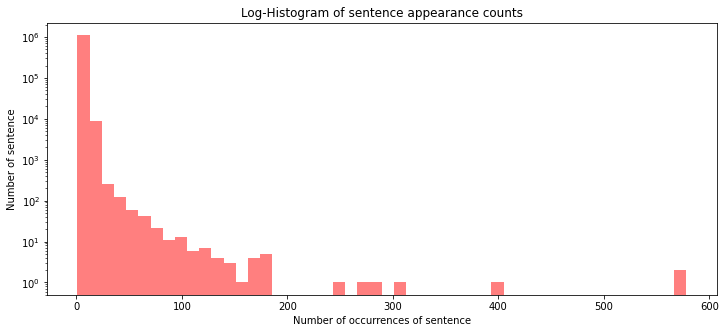

In [20]:
# 중복된 문장(x축)에 대해 시각화
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of sentence appearance counts')
plt.xlabel('Number of occurrences of sentence')
plt.ylabel('Number of sentence')

In [21]:
# 문장의 중복 분포를 통계치로 수치화하여 확인
counts = train_set.value_counts()

print(f'중복 최대 개수: {np.max(counts)}')
print(f'중복 최소 개수: {np.min(counts)}')
print('중복 평균 개수: {:.2f}'.format(np.mean(counts)))
print('중복 표준편차: {:2f}'.format(np.std(counts)))
print(f'중복 중간 길이: {np.median(counts)}')

print(f'제 1사분위 중복: {np.percentile(counts, 25)}')
print(f'제 3사분위 중복: {np.percentile(counts, 75)}')

중복 최대 개수: 578
중복 최소 개수: 1
중복 평균 개수: 1.69
중복 표준편차: 2.231190
중복 중간 길이: 1.0
제 1사분위 중복: 1.0
제 3사분위 중복: 3.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f51d6159208>],
 'caps': [<matplotlib.lines.Line2D at 0x7f51d6159be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f51d60f49e8>],
 'means': [<matplotlib.lines.Line2D at 0x7f51d60f46a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51d60f4320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f51d6159518>,
  <matplotlib.lines.Line2D at 0x7f51d6159860>]}

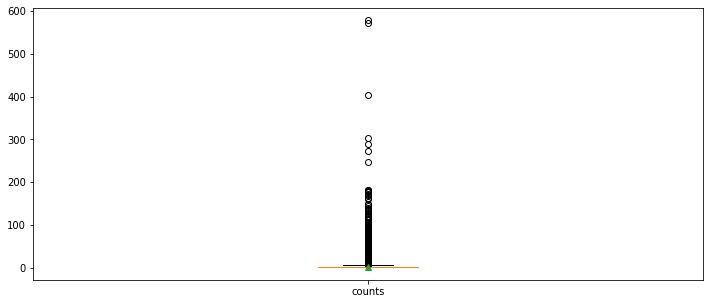

In [22]:
# 중복 횟수를 시각화
plt.figure(figsize=(12, 5))
plt.boxplot([counts], labels=['counts'], showmeans=True)

In [23]:
train_length = train_set.apply(len)

Text(0, 0.5, 'Probability')

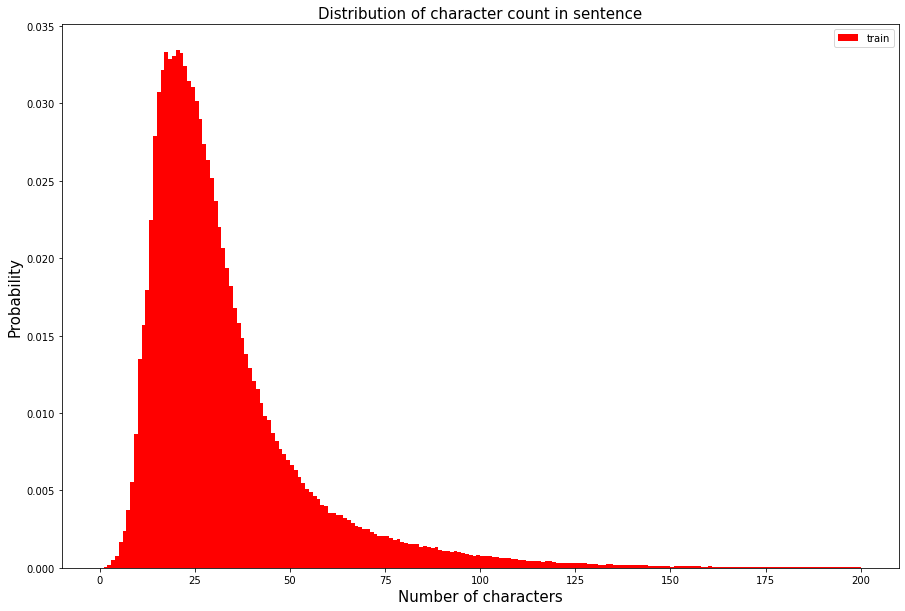

In [24]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [25]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 16542
문장 길이 평균 값: 33.02
문장 길이 표준편차: 47.97
문장 길이 중간 값: 26.0
문장 길이 제 1 사분위: 19.0
문장 길이 제 3 사분위: 39.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f51d6605198>],
 'caps': [<matplotlib.lines.Line2D at 0x7f51d65f8828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f51d65dbc18>],
 'means': [<matplotlib.lines.Line2D at 0x7f51d65db0b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51d65db748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f51d6605518>,
  <matplotlib.lines.Line2D at 0x7f51d6605358>]}

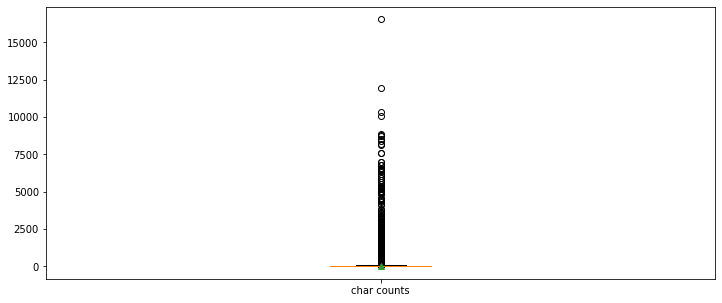

In [26]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

In [27]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Probability')

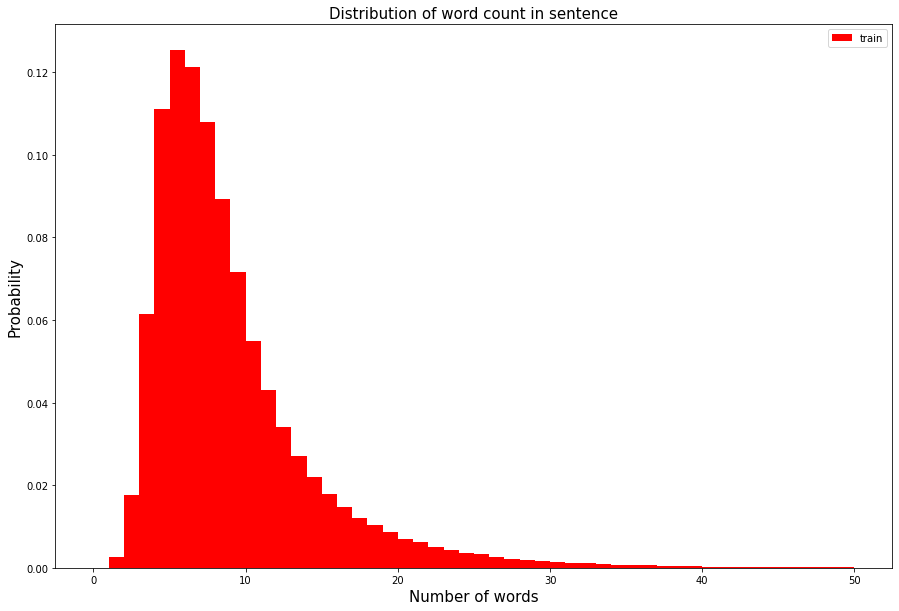

In [28]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [29]:
print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

문장 단어 개수 최대 값: 3295
문장 단어 개수 평균 값: 8.64
문장 단어 개수 표준편차: 10.08
문장 단어 개수 중간 값: 7.0
문장 단어 개수 제 1 사분위: 5.0
문장 단어 개수 제 3 사분위: 10.0
문장 단어 개수 99 퍼센트: 30.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f51d5dcca20>],
 'caps': [<matplotlib.lines.Line2D at 0x7f51d5ddc470>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f51d5de7278>],
 'means': [<matplotlib.lines.Line2D at 0x7f51d5ddcef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51d5ddcb70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f51d5dccd30>,
  <matplotlib.lines.Line2D at 0x7f51d5ddc0f0>]}

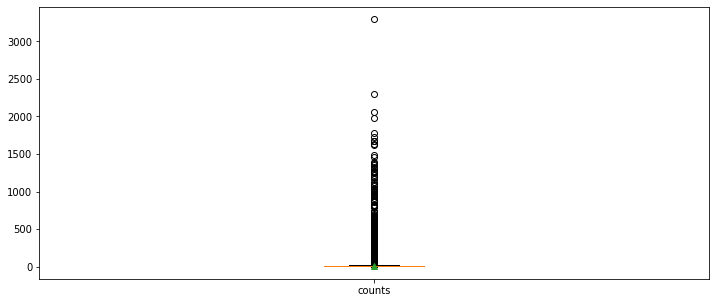

In [30]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [31]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개

In [32]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 문장: {:.2f}%'.format(math * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

물음표가있는 문장: 1.65%
수학 태그가있는 문장: 0.00%
마침표를 포함한 문장: 89.70%
첫 글자가 대문자 인 문장: 1.47%
대문자가있는 문장: 4.11%
숫자가있는 문장: 6.66%


In [33]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

## Tokenizer Cased

In [34]:
# BERT Tokenizer 호출
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

Text(0, 0.5, 'Probability')

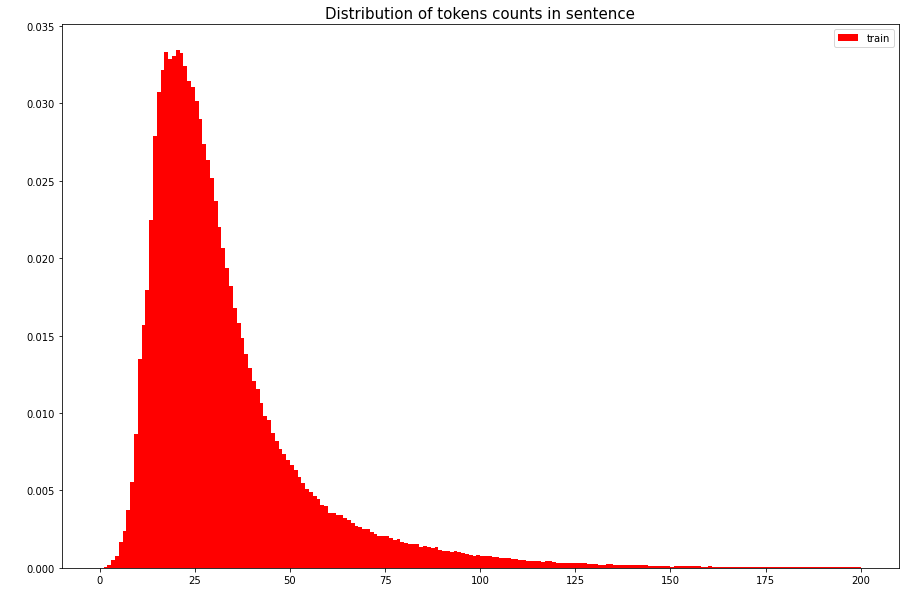

In [37]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens counts in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15, color='w')
plt.ylabel('Probability', fontsize=15, color='w')

In [38]:
print('문장 tokens 개수 최댓값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 중간값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

문장 tokens 개수 최댓값: 9006
문장 tokens 개수 평균값: 20.24
문장 tokens 개수 표준편차: 20.24
문장 tokens 개수 중간값: 16.0
문장 tokens 개수 제 1사분위: 11.0
문장 tokens 개수 제 3사분위: 24.0
문장 tokens 개수 99퍼센트: 72.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f51cc1348d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f51cc13e320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f51cc145128>],
 'means': [<matplotlib.lines.Line2D at 0x7f51cc13eda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f51cc13ea20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f51cc134be0>,
  <matplotlib.lines.Line2D at 0x7f51cc134f60>]}

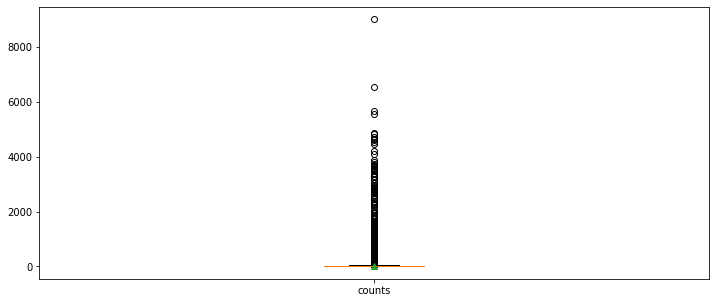

In [39]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_bert_token_counts,
            labels=['counts'], showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

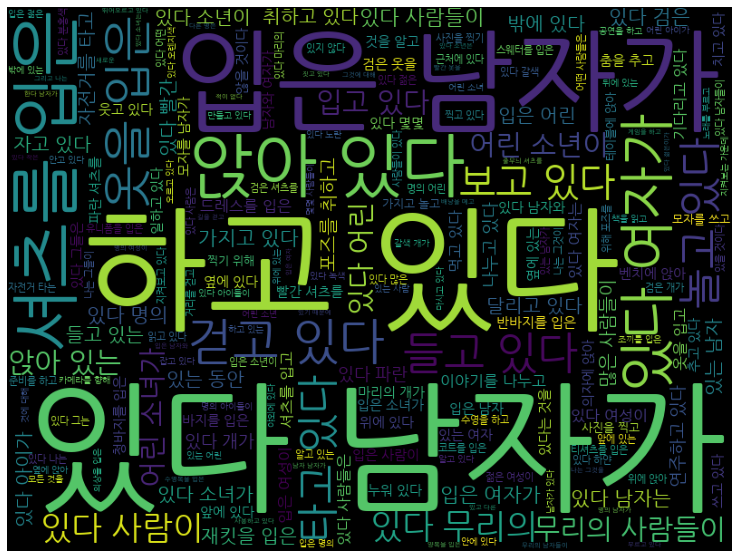

In [42]:
# wordcloud를 통해 단어 빈도 수 확인
font_path = os.path.join(DATA_IN_PATH, 'NanumGothic.ttf')
cloud = WordCloud(font_path = font_path, width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


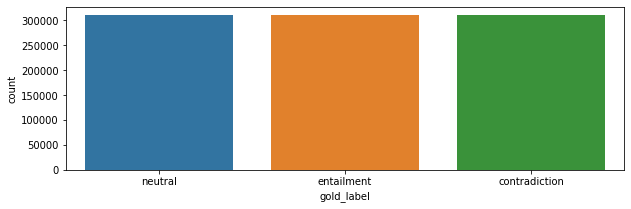

In [43]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(10, 3)
sns.countplot(train_data['gold_label'])